## Importing Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('dark_background')

print(sns.__version__)

0.13.2


In [2]:
df = pd.read_csv('D:\Akshat\Python_ML_Projects\Income Predictor\data2.csv')
df.head()
print(df.shape)

(32561, 15)


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Akshat\AppData\Local\Temp\ipykernel_15828\3675688547.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('D:\Akshat\Python_ML_Projects\Income Predictor\data2.csv')


## Exploring Dataset

In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Exploring Uniqueness of each column

In [4]:
[(col, df[col].nunique(), df[col].dtype) for col in df.columns]

[('age', 73, dtype('int64')),
 ('workclass', 9, dtype('O')),
 ('fnlwgt', 21648, dtype('int64')),
 ('education', 16, dtype('O')),
 ('education.num', 16, dtype('int64')),
 ('marital.status', 7, dtype('O')),
 ('occupation', 15, dtype('O')),
 ('relationship', 6, dtype('O')),
 ('race', 5, dtype('O')),
 ('sex', 2, dtype('O')),
 ('capital.gain', 119, dtype('int64')),
 ('capital.loss', 92, dtype('int64')),
 ('hours.per.week', 94, dtype('int64')),
 ('native.country', 42, dtype('O')),
 ('income', 2, dtype('O'))]

### Exploring Income column distribution in dataset

In [5]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

<Axes: xlabel='income', ylabel='count'>

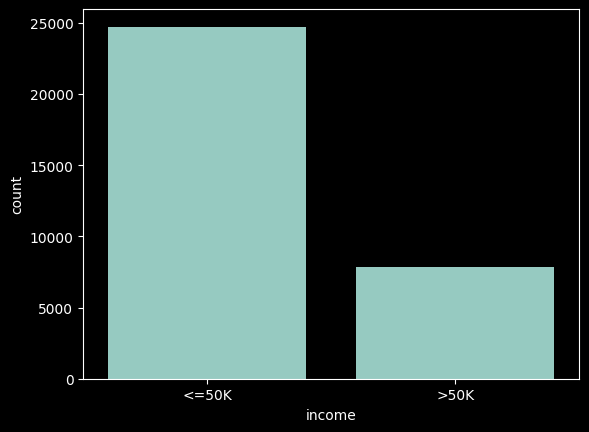

In [6]:
sns.countplot(x = 'income', data = df)

#### Income vs Gender/Sex

<Axes: xlabel='income', ylabel='count'>

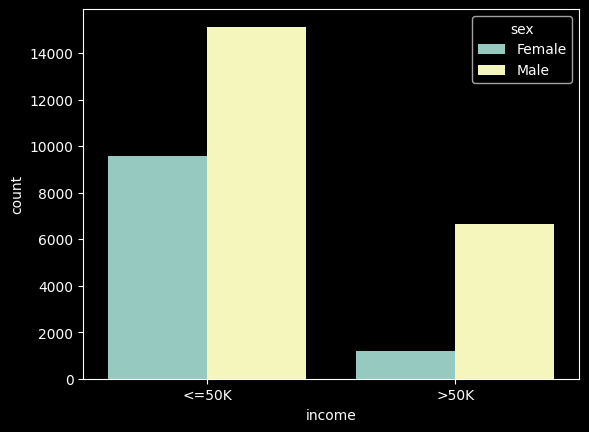

In [7]:
sns.countplot(x = 'income', hue = 'sex', data = df)

#### Income vs Race

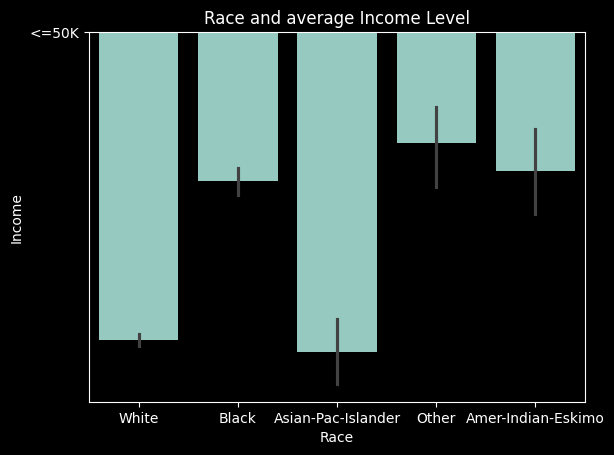

In [8]:
sns.barplot(y="income", x="race", data=df)
plt.xlabel("Race")
plt.ylabel("Income")
plt.title("Race and average Income Level")
plt.show()

#### Income vs Workclass

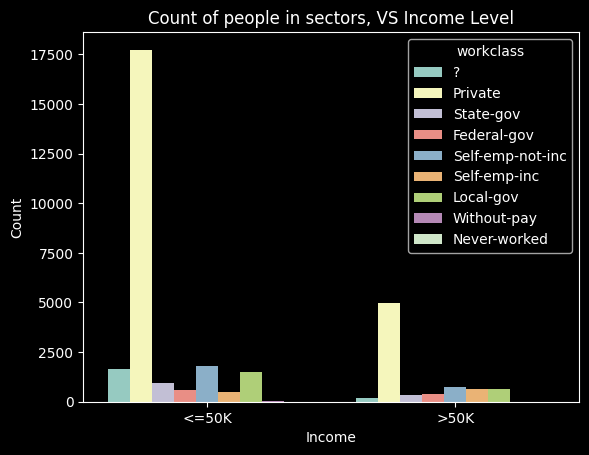

In [9]:
sns.countplot(x = 'income', hue = 'workclass', data = df)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Count of people in sectors, VS Income Level")
plt.show()

#### Income vs Education


In [10]:
print(df['education'].unique())
print(df['education.num'].unique())

['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


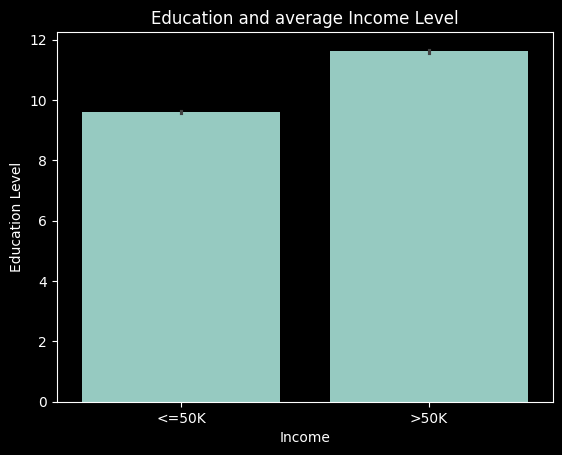

In [11]:
sns.barplot(y = 'education.num', x = 'income', data = df)
plt.xlabel("Income")
plt.ylabel("Education Level")
plt.title("Education and average Income Level")
plt.show()

#### Income vs Occupation

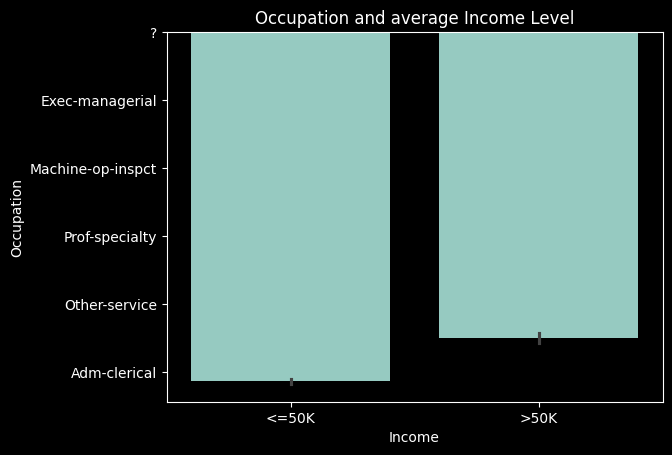

In [12]:
sns.barplot(y = 'occupation', x = 'income', data = df)
plt.xlabel("Income")
plt.ylabel("Occupation")
plt.title("Occupation and average Income Level")
plt.show()

### Exploring other columns in the dataset

#### Age vs Income Level

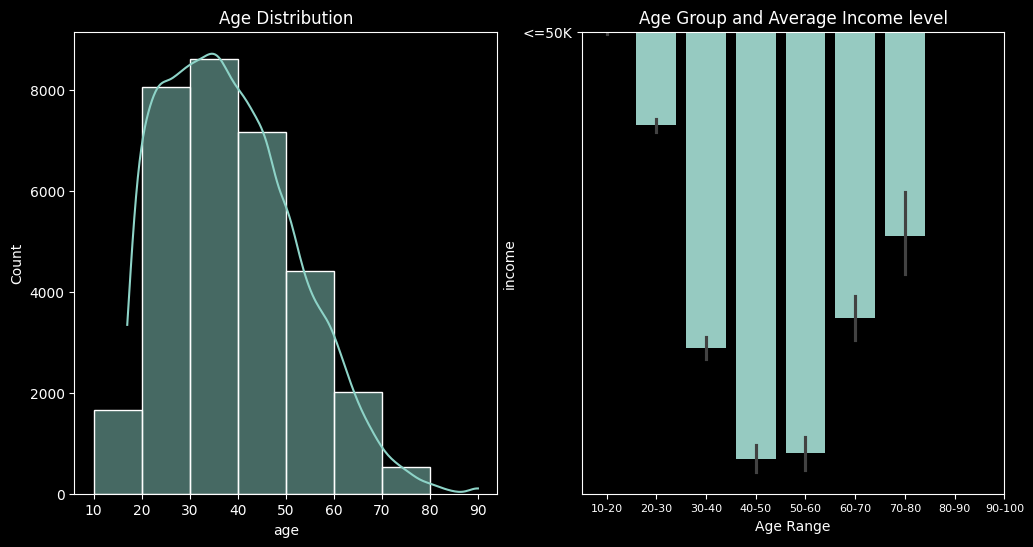

In [13]:
# Create bins for age groups (10-year intervals)
bins = np.arange(10, 90, 10)

# Cut ages into bins
df["age_bin"] = pd.cut(df["age"], bins, labels=range(len(bins)-1))

age_ranges = [f"{i}-{i+10}" for i in range(10, 100, 10)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the count plot
plt.subplot(1, 2, 2)
sns.barplot(x="age_bin", y="income", data=df, ax=axes[1])
plt.xlabel("Age Range")
axes[1].set_title('Age Group and Average Income level')
plt.xticks(range(len(age_ranges)), age_ranges, size = 8)

# Create a Histogram plot
sns.histplot(df['age'], bins = range(10, 90, 10), kde = True, ax=axes[0])
axes[0].set_title('Age Distribution')

plt.show()

#### Work Hours vs Income levelBaseException

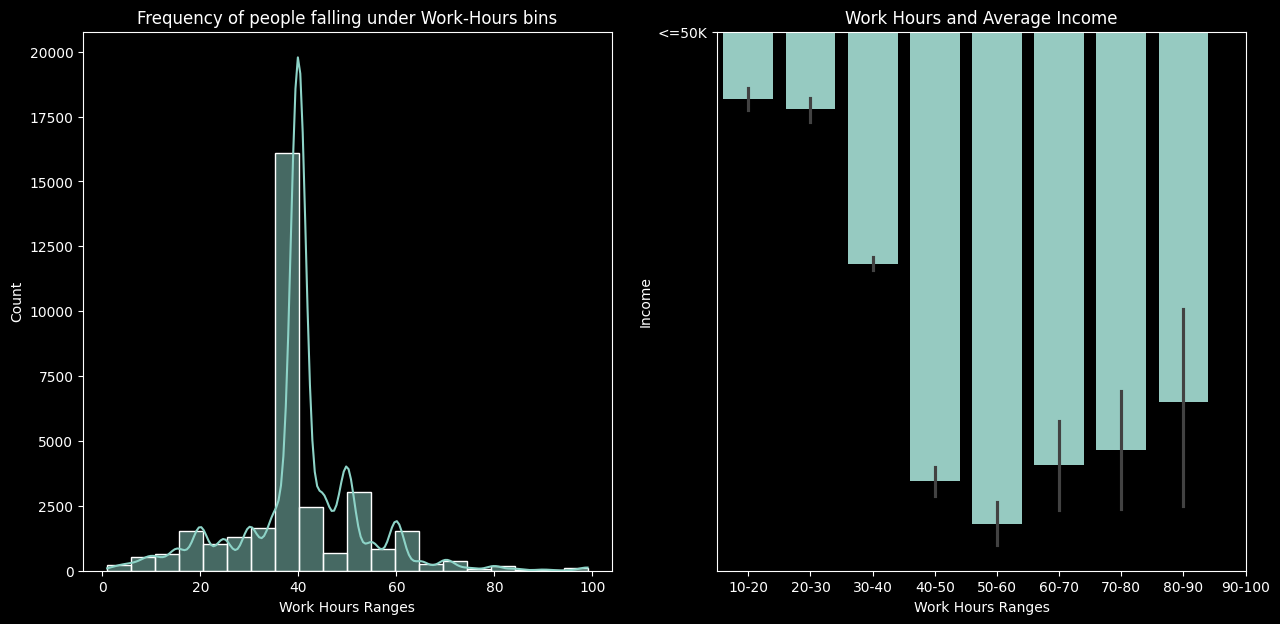

In [14]:
# Create bins for age groups (10-year intervals)
bins = np.arange(10, 100, 10)

# Cut ages into bins
df["work_hours_bin"] = pd.cut(df["hours.per.week"], bins, labels=range(len(bins)-1))

work_hours_ranges = [f"{i}-{i+10}" for i in range(10, 100, 10)]
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(1,2,1)
sns.histplot(x = df['hours.per.week'], kde = True, bins=20)
plt.xlabel("Work Hours Ranges")
plt.ylabel("Count")
plt.title("Frequency of people falling under Work-Hours bins")

plt.subplot(1,2,2)
sns.barplot(x="work_hours_bin", y="income", data=df)
plt.xlabel("Work Hours Ranges")
plt.ylabel("Income")
plt.xticks(range(len(work_hours_ranges)), work_hours_ranges)
plt.title("Work Hours and Average Income")


plt.show()

#### Native Country vs Income Level

Text(0.5, 1.0, 'Country-wise Income')

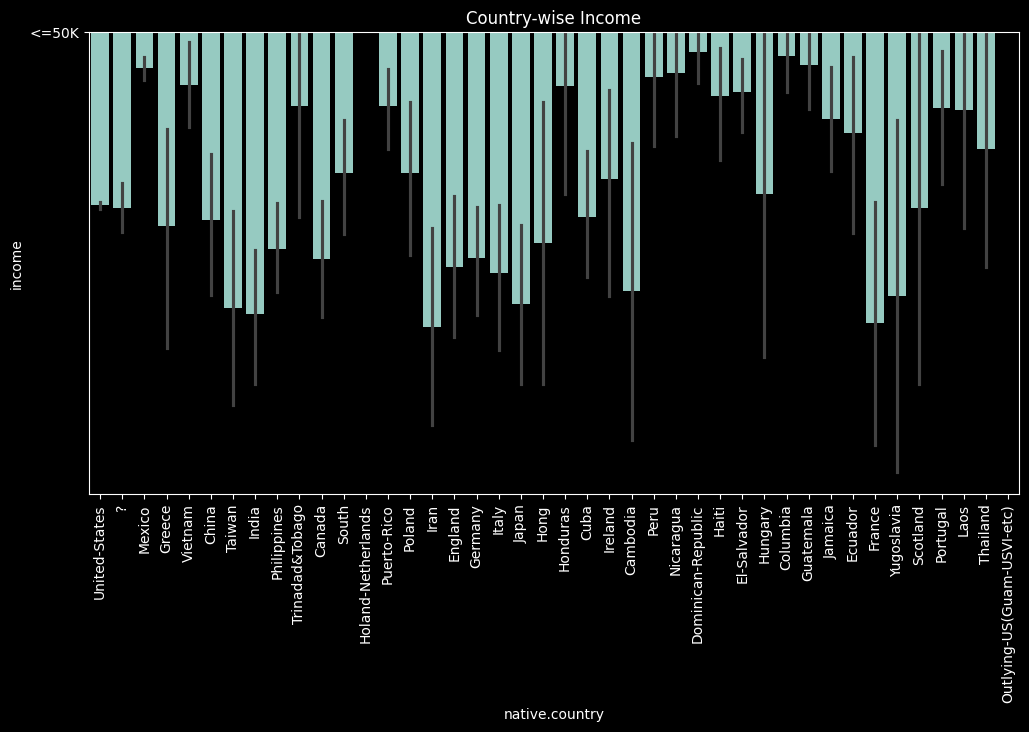

In [15]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'native.country', y = 'income', data = df);
plt.xticks(rotation = 90);
plt.title('Country-wise Income')

#### Capital Gain and Capital Loss vs Income

Text(0.5, 1.0, 'Capital Loss vs. Income')

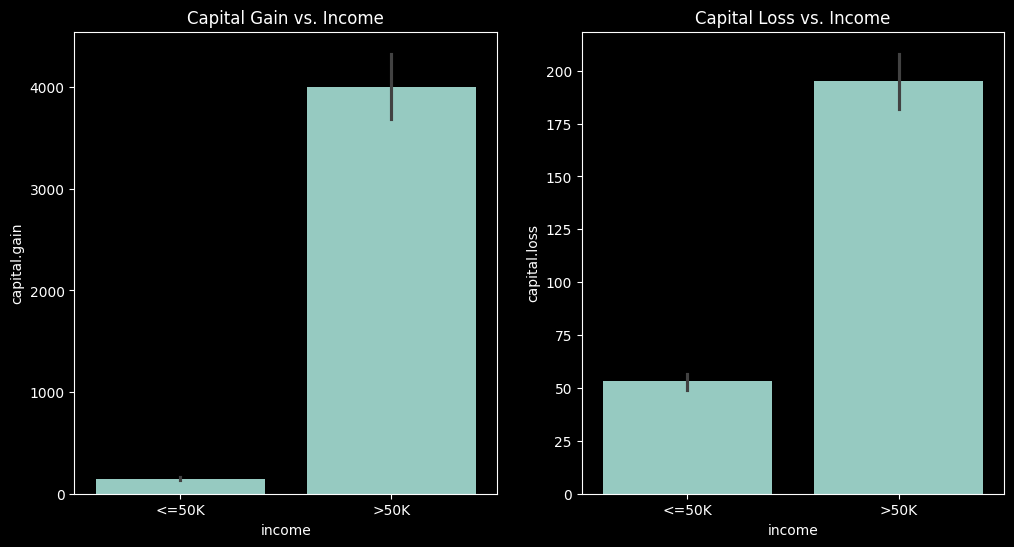

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Capital Gain vs. Income
sns.barplot(x='income', y='capital.gain', data=df, ax=axes[0])
axes[0].set_title('Capital Gain vs. Income')

# Scatter plot for Capital Loss vs. Income
sns.barplot(x='income', y='capital.loss', data=df, ax=axes[1])
axes[1].set_title('Capital Loss vs. Income')


## Duplicate values

In [17]:
duplicates = df[df.duplicated()]
print(duplicates)

       age         workclass  fnlwgt     education  education.num  \
8453    25           Private  308144     Bachelors             13   
8645    90           Private   52386  Some-college             10   
12202   21           Private  250051  Some-college             10   
14346   20           Private  107658  Some-college             10   
15603   25           Private  195994       1st-4th              2   
17344   21           Private  243368     Preschool              1   
19067   46           Private  173243       HS-grad              9   
20388   30           Private  144593       HS-grad              9   
20507   19           Private   97261       HS-grad              9   
22783   19           Private  138153  Some-college             10   
22934   19           Private  146679  Some-college             10   
23276   49           Private   31267       7th-8th              4   
23660   25           Private  195994       1st-4th              2   
23720   44           Private  3677

## Null Values Detection and removal

In [18]:
df = df.replace('?', pd.NA)  # replace '?' with NaN
df = df.dropna()  # remove rows with missing values

## Outlier Detection and Removal

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29482 entries, 3 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29482 non-null  int64   
 1   workclass       29482 non-null  object  
 2   fnlwgt          29482 non-null  int64   
 3   education       29482 non-null  object  
 4   education.num   29482 non-null  int64   
 5   marital.status  29482 non-null  object  
 6   occupation      29482 non-null  object  
 7   relationship    29482 non-null  object  
 8   race            29482 non-null  object  
 9   sex             29482 non-null  object  
 10  capital.gain    29482 non-null  int64   
 11  capital.loss    29482 non-null  int64   
 12  hours.per.week  29482 non-null  int64   
 13  native.country  29482 non-null  object  
 14  income          29482 non-null  object  
 15  age_bin         29482 non-null  category
 16  work_hours_bin  29482 non-null  category
dtypes: category(2), i

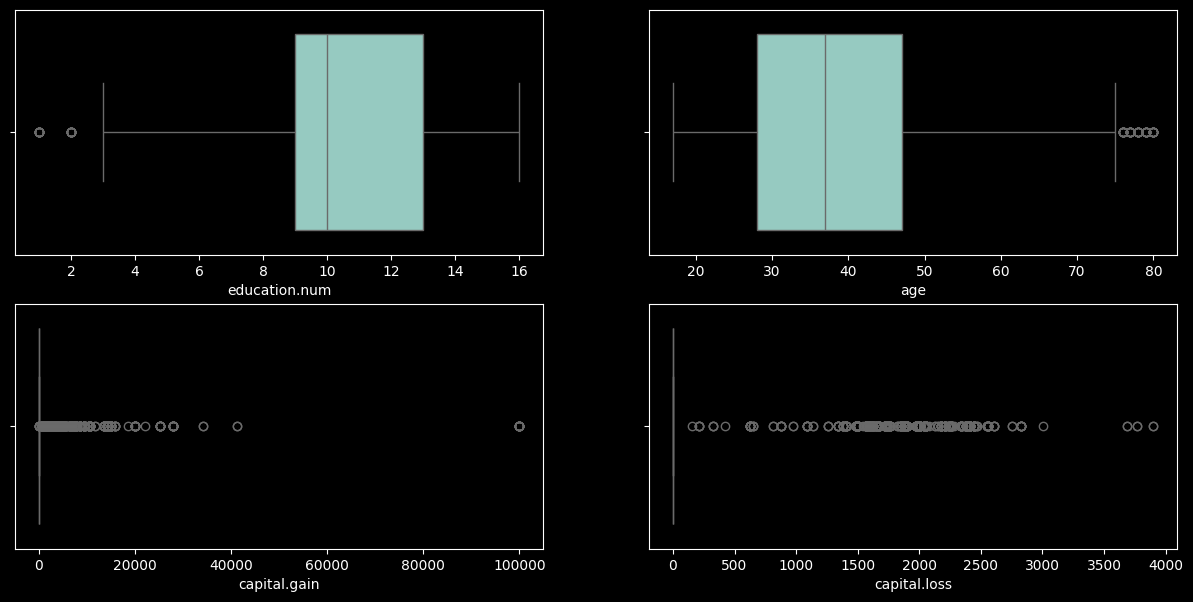

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
sns.boxplot(x = 'education.num', data = df, ax=axes[0, 0])
sns.boxplot(x = 'age', data = df, ax=axes[0, 1])
sns.boxplot(x = 'capital.gain', data = df, ax=axes[1, 0])
sns.boxplot(x = 'capital.loss', data = df, ax=axes[1, 1])
plt.show()

In [21]:
columns = ['age', 'education.num', 'capital.gain', 'capital.loss']

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the specified columns
df = remove_outliers(df, columns)

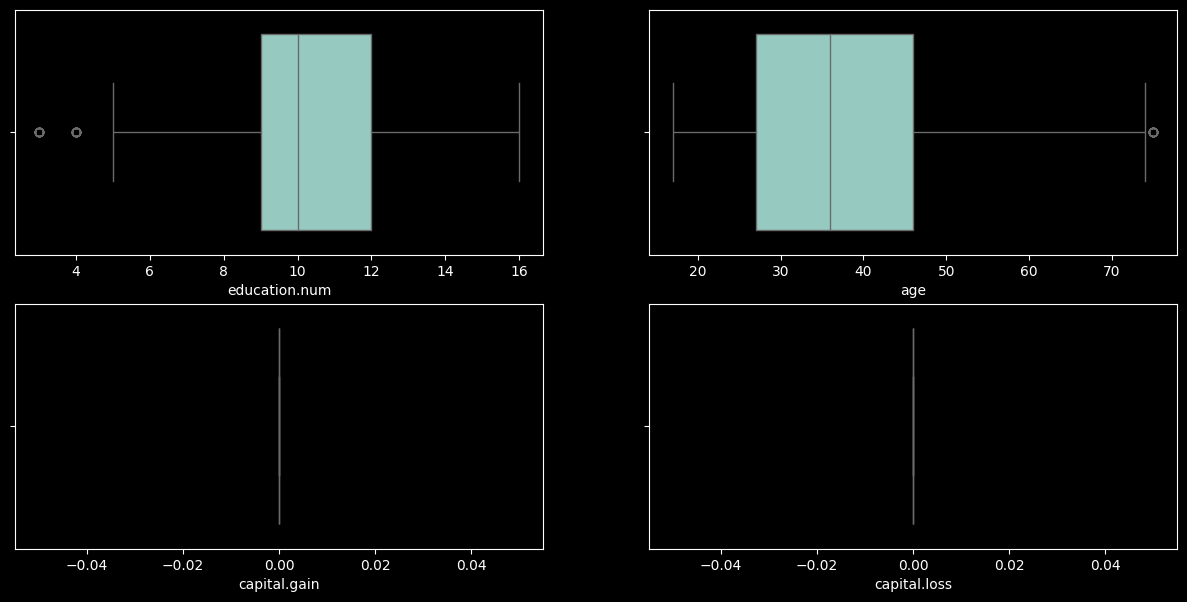

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
sns.boxplot(x = 'education.num', data = df, ax=axes[0, 0])
sns.boxplot(x = 'age', data = df, ax=axes[0, 1])
sns.boxplot(x = 'capital.gain', data = df, ax=axes[1, 0])
sns.boxplot(x = 'capital.loss', data = df, ax=axes[1, 1])
plt.show()

## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_workclass = LabelEncoder()
le_occupation = LabelEncoder()
le_sex = LabelEncoder()

df['workclass'] = le_workclass.fit_transform(df['workclass'])

df['occupation'] = le_occupation.fit_transform(df['occupation'])

df['sex'] = le_sex.fit_transform(df['sex'])

df['relationship'] = le.fit_transform(df['relationship'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])
df['income'] = le.fit_transform(df['income'])

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_bin,work_hours_bin
4231,50,4,83311,Bachelors,13,2,3,0,4,1,0,0,13,37,0,3,0
4232,38,2,215646,HS-grad,9,0,5,1,4,1,0,0,40,37,0,2,2
4233,53,2,234721,11th,7,2,5,0,2,1,0,0,40,37,0,4,2
4234,28,2,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0,1,2
4235,37,2,284582,Masters,14,2,3,5,4,0,0,0,40,37,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,Some-college,10,4,10,1,4,1,0,0,40,37,0,1,2
32557,27,2,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,37,0,1,2
32558,40,2,154374,HS-grad,9,2,6,0,4,1,0,0,40,37,1,2,2
32559,58,2,151910,HS-grad,9,6,0,4,4,0,0,0,40,37,0,4,2


In [24]:
df['income'].unique()

array([0, 1])

In [25]:
df.drop(['age_bin', 'work_hours_bin', 'education'], axis = 1, inplace= True)
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4231,50,4,83311,13,2,3,0,4,1,0,0,13,37,0
4232,38,2,215646,9,0,5,1,4,1,0,0,40,37,0
4233,53,2,234721,7,2,5,0,2,1,0,0,40,37,0
4234,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
4235,37,2,284582,14,2,3,5,4,0,0,0,40,37,0


### Checking workclass and occupation encoding

In [26]:
workclass_mapping = dict(zip(le_workclass.classes_, le_workclass.transform(le_workclass.classes_)))
occupation_mapping = dict(zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_)))
sex_mapping = dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))

print("Workclass Mapping:", workclass_mapping)
print("Occupation Mapping:", occupation_mapping)
print("Occupation Mapping:", sex_mapping)

Workclass Mapping: {'Federal-gov': 0, 'Local-gov': 1, 'Private': 2, 'Self-emp-inc': 3, 'Self-emp-not-inc': 4, 'State-gov': 5, 'Without-pay': 6}
Occupation Mapping: {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
Occupation Mapping: {'Female': 0, 'Male': 1}


## Correlation

<Axes: >

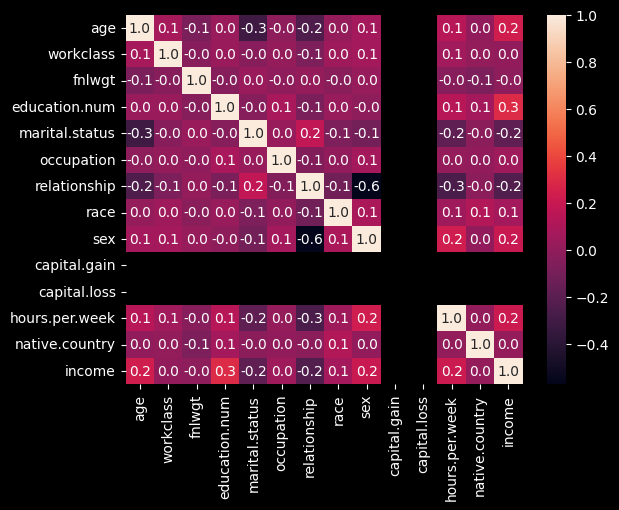

In [27]:
sns.heatmap(df.corr(), annot = True, fmt='.1f')

Based on the correlation matrix, it seems that education.num (education number) has the highest positive correlation with income. This suggests that people with higher levels of education tend to have higher incomes.

age also shows a moderate positive correlation with income, indicating that older individuals may have higher incomes.

hours.per.week and capital.gain have a slightly positive correlation with income, suggesting that working longer hours and having capital gains might be associated with higher income levels.

marital.status seems to have a slightly negative correlation with income, which could imply that certain marital statuses might be associated with lower income levels.

So, we can reduce the number of columns further more by selecting the columns with positive correlation only.

In [28]:
columns_to_keep = [
    'income','education.num', 'age', 'hours.per.week', 'sex', 'workclass', 'occupation'
]
df = df.loc[:, columns_to_keep]
print(df.shape)
df

(25360, 7)


,income,education.num,age,hours.per.week,sex,workclass,occupation
4231,0,13,50,13,1,4,3
4232,0,9,38,40,1,2,5
4233,0,7,53,40,1,2,5
4234,0,13,28,40,0,2,9
4235,0,14,37,40,0,2,3
...,...,...,...,...,...,...,...
32556,0,10,22,40,1,2,10
32557,0,12,27,38,0,2,12
32558,1,9,40,40,1,2,6
32559,0,9,58,40,0,2,0


## Splitting train data

In [29]:
feature_columns = df.columns[df.columns != 'income']
target_column = 'income'

In [30]:
X = df[feature_columns]
y = df[target_column]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Convert y_train to a DataFrame
y_train_df = pd.DataFrame(y_train, columns=[target_column]) 
# Give columns back to X_train
X_train_df = pd.DataFrame(X_train, columns=feature_columns) 
# Concatenate DataFrames 
train_data = pd.concat([X_train_df, y_train_df], axis=1)

print(train_data.shape)
print(df.shape)

(27053, 7)
(25360, 7)


## Model Training 

In [31]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = gb.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6086
           1       0.54      0.39      0.46      1522

    accuracy                           0.81      7608
   macro avg       0.70      0.66      0.67      7608
weighted avg       0.80      0.81      0.80      7608

[[5584  502]
 [ 921  601]]
81.29600420609884


## Metrics

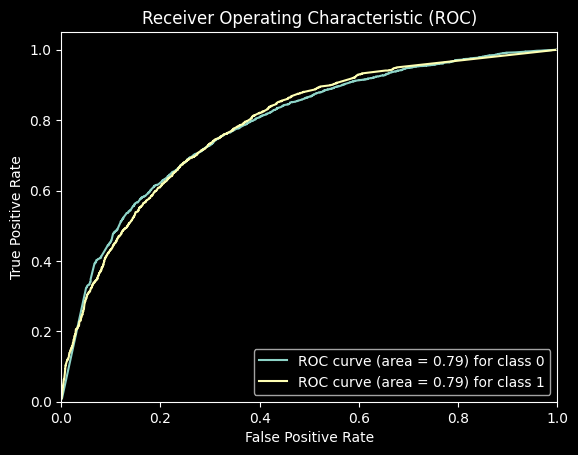

Confusion Matrix:
[[5520  566]
 [ 884  638]]


<Axes: >

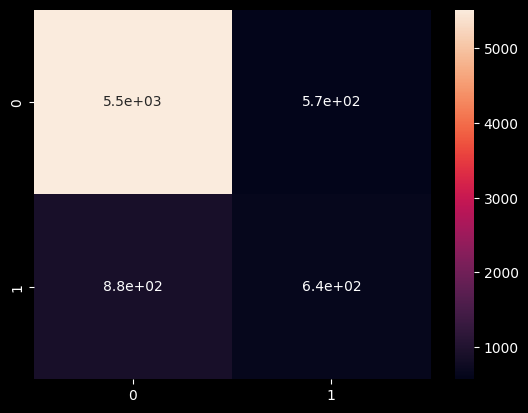

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)

n_classes = len(clf.classes_)  # Get the number of classes from the classifier

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=clf.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %i' % (roc_auc[i], clf.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True)

## Logistic regression

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['none', 'l2'],

}
log_reg = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(
    estimator=log_reg, param_grid=param_grid,scoring='accuracy', cv=2,n_jobs=-1,verbose=3
    )
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8216538981523209


C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Akshat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pa

In [35]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Best Model Performance:
Accuracy: 0.8184805467928497
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6086
           1       0.60      0.28      0.38      1522

    accuracy                           0.82      7608
   macro avg       0.72      0.62      0.64      7608
weighted avg       0.79      0.82      0.79      7608



In [36]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss', n_estimators=100,)
import joblib
model_path = 'xgb_model.pkl'
joblib.dump(xgb_clf, model_path)

print(f"Model saved to {model_path}")

Model saved to xgb_model.pkl


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2990
           1       0.86      0.85      0.85      3085

    accuracy                           0.85      6075
   macro avg       0.85      0.85      0.85      6075
weighted avg       0.85      0.85      0.85      6075



<Axes: >

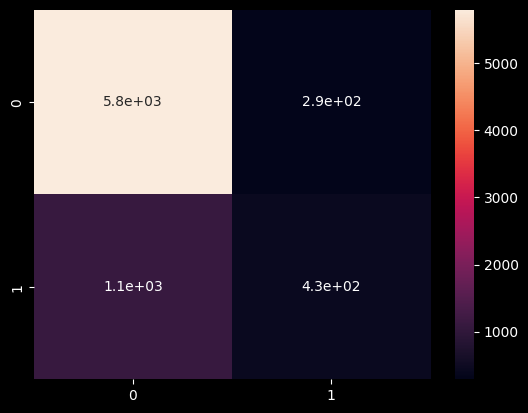

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote=SMOTE()
rus=RandomUnderSampler()
y.value_counts()

X_resampled,y_resampled=smote.fit_resample(X_scaled,y)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, train_size=0.5,test_size=0.15, random_state=42 
    )

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svc_clf = XGBClassifier(random_state=42)
svc_clf.fit(X_train_resampled, y_train_resampled)
from sklearn.metrics import classification_report
y_pred_svc = svc_clf.predict(X_test_resampled)
print(classification_report(y_test_resampled, y_pred_svc))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)